In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 📌 Harris Corner Detection - Detailed Explanation

## 🎯 Objective
Understand the concepts behind Harris Corner Detection and learn how to use the following OpenCV functions:

- `cv.cornerHarris()`
- `cv.cornerSubPix()`

---

## 📖 Basic Theory
In the previous lesson, we learned that **corners** are regions in an image with strong intensity changes in all directions.

---

## 👨‍🔬 Theoretical Background
This idea was introduced by **Chris Harris & Mike Stephens** in their 1988 paper:  
📝 *"A Combined Corner and Edge Detector"*

---

## 📐 Mathematical Formulation

They modeled the intensity change for a small displacement $(u,v)$ using the equation:

$$
E(u,v) \approx
\begin{bmatrix}
u & v
\end{bmatrix}
M
\begin{bmatrix}
u \\
v
\end{bmatrix}
$$

Where **M** is the *structure matrix*:

$$
M = \sum
\begin{bmatrix}
I_x^2 & I_x I_y \\
I_x I_y & I_y^2
\end{bmatrix}
$$

- $I_x$, $I_y$: Image derivatives in the x and y directions  
  *(Can be computed using `cv.Sobel()`)*
  
---

## 🧮 Corner Response Function R

To determine if a region is a corner, they introduced a response function:

$$
R = \det(M) - k \cdot (\text{trace}(M))^2
$$

Where:
- $\det(M) = \lambda_1 \cdot \lambda_2$
- $\text{trace}(M) = \lambda_1 + \lambda_2$
- $\lambda_1$, $\lambda_2$: Eigenvalues of matrix $M$
- $k$: Empirical constant, typically in the range **0.04–0.06**

---

## 📊 Interpretation of R values

| Case           | R Value        | Meaning               |
|----------------|----------------|------------------------|
| Small R        | $R < 0$        | Edge                  |
| Large R        | $R > 0$        | Good corner region    |

---

## 📊 Visual Interpretation

| Region Type | Eigenvalues $(\lambda_1, \lambda_2)$ | Description                           |
|-------------|--------------------------------------|---------------------------------------|
| Corner      | Both large, $\lambda_1 \approx \lambda_2$ | $E(u,v)$ increases in all directions |
| Edge        | One large, one small                 | $E(u,v)$ increases along the perpendicular |
| Flat        | Both small                           | Low intensity change                 |

---

### 🧪 Harris Corner Detection in OpenCV

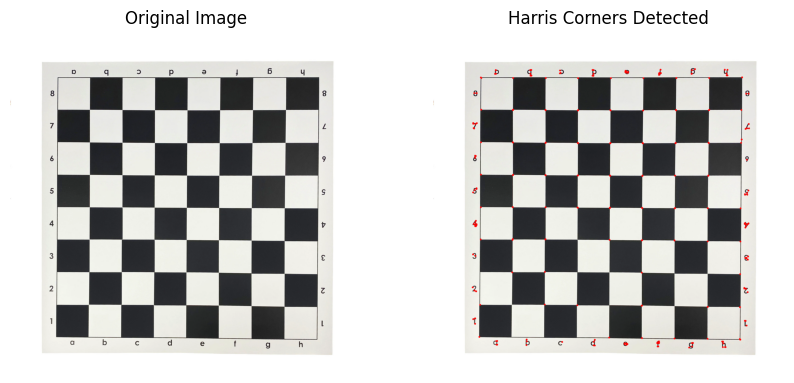

In [22]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
filename = '/content/drive/MyDrive/FPT Material + Study/Sem 4/CPV301/Source for PE/Feature Detection and Description/Image/chessboard.jpg'
img = cv.imread(filename)
assert img is not None, "Could not open or find the image!"

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect corners using Harris Corner Detection
gray = np.float32(gray)
dst = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner detections
dst = cv.dilate(dst, None)

# Threshold for corner detection
threshold = 0.25 * dst.max()

# Create a copy of the original image for marking corners
img_corners = img.copy()

# Draw circles at corner locations to make them more visible
for y in range(dst.shape[0]):
    for x in range(dst.shape[1]):
        if dst[y, x] > threshold:
            cv.circle(img_corners, (x, y), radius=5, color=(0, 0, 255), thickness=-1)

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corners, cv.COLOR_BGR2RGB))
plt.title('Harris Corners Detected')
plt.axis('off')
plt.show()
